<h1 align="center"> SANTANDER CHALLENGE PROJECT </h1>
<br>
<center>University of Rome “Tor Vergata” - Master Big Data in Business 2019</center>
<br>
<div style='text-align: right'>27/06/2019<br> Federico Francone</div>

In [0]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/Colab\ Notebooks  

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [1]:
import pandas as pd
import numpy as np
from sklearn  import preprocessing, decomposition
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Lasso
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve, KFold
from sklearn.model_selection import RandomizedSearchCV, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, make_scorer, roc_curve, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [0]:
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd:goldenrod', 'xkcd:cadet blue', 
          'xkcd:scarlet']

In [0]:
data = pd.read_csv("./dataset.csv", delimiter=';')
data.set_index('ID', inplace=True)
# last column is target, store in array t
t = data.as_matrix(['TARGET'])

"""# count number of positive and negative items
c, counts = np.unique(t, return_counts=True)
negative = counts[0]
positive = counts[1]"""


C:\Users\feder\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [0]:
data.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
21638,2,40,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99968.40,1
119266,2,46,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99946.59,0
108190,2,23,0.0,103.35,103.35,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99921.81,0
105047,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99909.60,1
51076,2,28,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99863.61,0


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6016 entries, 21638 to 151804
Columns: 370 entries, var3 to TARGET
dtypes: float64(111), int64(259)
memory usage: 17.0 MB


Evaluate degree of sparsity of original matrix

In [0]:
from numpy import count_nonzero
print("DEGREE OF SPARSITY OF MATRIX: ", (1.0 - count_nonzero(data) / data.size).round(3) * 100, '%')

DEGREE OF SPARSITY OF MATRIX:  91.5 %


## TRAIN TEST SPLIT AND SCALING

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(labels=['TARGET'], axis=1), data['TARGET'],test_size=0.25,random_state=0)
#standardizer = Pipeline([('standardizzo', StandardScaler().fit_transform())])

#standardizzo train

scaler=StandardScaler()
X_train_scaled=  pd.DataFrame(scaler.fit_transform(X_train), columns= X_train.columns)

#standardizzo test. Uso mean e standard deviation che ho visto nel training, quindi faccio solo .transform() 
#(non avrebbe senso fare .fit per il test, barerei!)

scaled_test= scaler.transform(X_test)
scaled_test= pd.DataFrame(scaled_test, columns= X_test.columns)

X_train_scaled.head(2)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var17_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,0.033290,-0.960583,0.173667,0.521308,0.710403,-0.048883,-0.059525,-0.040587,-0.041514,-0.053949,...,-0.021393,-0.021033,-0.014889,-0.01874,-0.019391,-0.017793,-0.014889,-0.021619,-0.021363,-0.156780
1,0.036476,1.747971,-0.063103,-0.223953,-0.241413,-0.048883,-0.059525,-0.040587,-0.041514,-0.053949,...,-0.021393,-0.021033,-0.014889,-0.01874,-0.019391,-0.017793,-0.014889,-0.021619,-0.021363,0.658623


### See PART 1 for The ML Models

# NEURAL NETWORKS

In [2]:
from sklearn import datasets, linear_model
from keras import regularizers
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras

lr= 0.001
adam= optimizers.Adam(lr= lr)

Using TensorFlow backend.


In [0]:
#create validation set 
train_setNN, val_setNN, y_trainNN, y_valNN = train_test_split(scaled_train, y_train, test_size=0.2,random_state=0)
len(train_setNN), len(train_setNN)+ len(val_setNN)== len(scaled_train)

(3609, True)

<b> Creating a baseline model to practice using KerasClassifier wrapper

In [0]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=len(X_train_scaled.columns), activation='relu'))
    model.add(Dense(10, input_dim=len(X_train_scaled.columns), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))   #anche softmax va bene, ma sigmoid dà molta più accuratezza. Penso perchè sigmoid è caso binario, softmax più classi
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  #se piu categorie metto categorical_crossentropy
    return model

In [0]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=10, batch_size=10, verbose=2)
history= estimator.fit(train_setNN, y_trainNN, validation_data=(val_setNN, y_valNN))  

W0628 18:18:10.155143 140059264472960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0628 18:18:10.162055 140059264472960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0628 18:18:10.166748 140059264472960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0628 18:18:10.209528 140059264472960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0628 18:18:10.231691 140059264472960 deprecation_wrappe

Train on 3609 samples, validate on 903 samples
Epoch 1/10
 - 5s - loss: 0.6078 - acc: 0.6922 - val_loss: 0.5692 - val_acc: 0.7065
Epoch 2/10
 - 1s - loss: 0.5395 - acc: 0.7398 - val_loss: 0.5475 - val_acc: 0.7231
Epoch 3/10
 - 1s - loss: 0.5216 - acc: 0.7553 - val_loss: 0.5366 - val_acc: 0.7309
Epoch 4/10
 - 1s - loss: 0.5077 - acc: 0.7587 - val_loss: 0.5394 - val_acc: 0.7375
Epoch 5/10
 - 1s - loss: 0.5040 - acc: 0.7600 - val_loss: 0.5367 - val_acc: 0.7320
Epoch 6/10
 - 1s - loss: 0.4944 - acc: 0.7670 - val_loss: 0.5385 - val_acc: 0.7342
Epoch 7/10
 - 1s - loss: 0.4869 - acc: 0.7697 - val_loss: 0.5342 - val_acc: 0.7276
Epoch 8/10
 - 1s - loss: 0.4820 - acc: 0.7697 - val_loss: 0.5521 - val_acc: 0.7331
Epoch 9/10
 - 1s - loss: 0.4791 - acc: 0.7750 - val_loss: 0.5412 - val_acc: 0.7364
Epoch 10/10
 - 1s - loss: 0.4709 - acc: 0.7756 - val_loss: 0.5544 - val_acc: 0.7209


In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

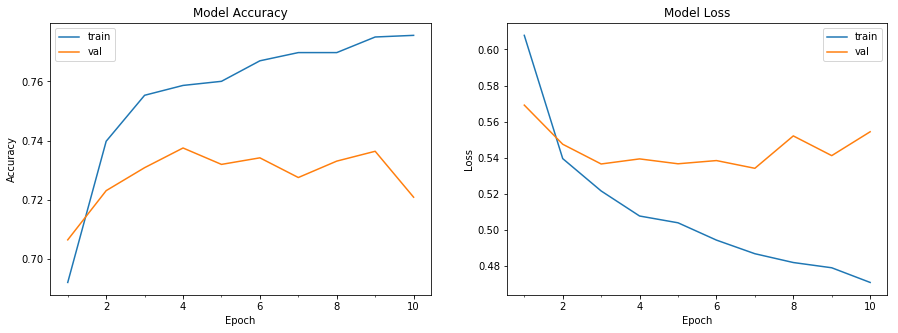

In [0]:
plot_model_history(history)

**Accuracy seems to grow fast in the first 4 epochs, then it does not improve regularly. With too many epochs we would be in overfitting**

In [0]:
print("loss function and train accuracy are: ", history.model.evaluate(train_setNN, y_trainNN))
print("loss function and validation accuracy are: ", history.model.evaluate(val_setNN, y_valNN))
print("loss function and test accuracy are: ", history.model.evaluate(scaled_test, y_test))

3609/3609 [==============================] - 0s 46us/step
loss function and train accuracy are:  [0.4767459826180069, 0.7722360762938069]
903/903 [==============================] - 0s 43us/step
loss function and validation accuracy are:  [0.5544142845857183, 0.7209302326241469]
1504/1504 [==============================] - 0s 45us/step
loss function and test accuracy are:  [0.6047350542342409, 0.7240691489361702]


**I obtained 74% of accuracy on the test set with this simple Dense Neural Network**

# Basic Gridsearch for NN

In [0]:
"""lr=[1e-2, 1e-3, 1e-4]
decay=[1e-6,1e-9,0]"""

def binary_classifier(nl1=1, nl2=1,  nl3=1, 
                 nn1=1000, nn2=500, nn3 = 200, lr=0.01, decay=0., l1=0.01, l2=0.01, dropout=0.2):
    # create model
    opt = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999,  decay=decay)
    reg = keras.regularizers.l1_l2(l1=l1, l2=l2)
    
    model = Sequential()
    model.add(Dense(nn1, input_dim=len(X_train_scaled.columns), activation='relu', kernel_initializer=keras.initializers.he_normal(seed=1)))
    model.add(Dropout(dropout))
    model.add(Dense(nn2, input_dim=len(X_train_scaled.columns), activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(nn3, input_dim=len(X_train_scaled.columns), activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))   
    #anche softmax va bene, ma sigmoid dà molta più accuratezza. Penso perchè sigmoid è caso binario, softmax più classi
    # NB: Se volevo usare softmax dovevo mettere 2 layer Dense nell'output invece di 1
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer= opt, metrics=['accuracy'])  #se piu categorie metto categorical_crossentropy
    return model

In [0]:
estimator = KerasClassifier(build_fn=binary_classifier, verbose=2)

In [0]:
param_grid = dict(
        epochs= [15,20,30,40],
        batch_size= [30, 40, 50, 60] ) 

grid_NN = RandomizedSearchCV(estimator=estimator, param_distributions=param_grid ) 
grid_NN = grid_NN.fit(scaled_train, y_train, validation_data=(scaled_test, y_test)) 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Train on 3008 samples, validate on 903 samples
Epoch 1/15
3008/3008 [==============================] - 5s 2ms/step - loss: 40.0943 - acc: 0.4960 - val_loss: 13.3527 - val_acc: 0.4950
Epoch 2/15
3008/3008 [==============================] - 0s 125us/step - loss: 12.2520 - acc: 0.4997 - val_loss: 11.2255 - val_acc: 0.4950
Epoch 3/15
3008/3008 [==============================] - 0s 125us/step - loss: 11.8806 - acc: 0.4977 - val_loss: 11.8980 - val_acc: 0.4950
Epoch 4/15
3008/3008 [==============================] - 0s 123us/step - loss: 11.9358 - acc: 0.5066 - val_loss: 12.4889 - val_acc: 0.4950
Epoch 5/15
3008/3008 [==============================] - 0s 120us/step - loss: 12.0399 - acc: 0.5030 - val_loss: 12.1495 - val_acc: 0.4950
Epoch 6/15
3008/3008 [==============================] - 0s 126us/step - loss: 12.0569 - acc: 0.5090 - val_loss: 12.1188 - val_acc: 0.4950
Epoch 7/15
3008/3008 [==============================] - 0s 119us/step - loss: 12.0570 - acc: 0.5050 - val_loss: 12.0394 - val_a

In [0]:
"""check_point = ModelCheckpoint(file_path, monitor="val_acc", verbose=1, save_best_only=True, mode="max")
early_stop = EarlyStopping(monitor="val_acc", mode="max", patience=5)"""

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f615927b198>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'batch_size': [10, 20, 30, 50, 80],
                                        'epochs': [10, 20]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [0]:
def summary_grid_NN(grid_fit):
    print('best score on validation: ', grid_fit.best_score_)   #data combinazione parametri, è accuratezza media valutata sulle K cross validation. quindi è sempre una validation accuracy
    print('best param combination: ', grid_fit.best_params_)   #'C': 0.357
    print('predictions', grid_fit.predict(scaled_test))
    #posso predire scaled_test, quello con tutte le 369 feauters: lui da solo ne toglierà alcune con lasso, è gia incorporato
    print('train accuracy TP+TN/tot is {}'.format(accuracy_score(Y_train, grid_fit.predict(scaled_train))))
    print('test accuracy TP+TN/tot is {}'.format(accuracy_score(Y_test, grid_fit.predict(scaled_test))))
    #print("cross validation accuracy sul train è: ", cross_val_score(estimator = grid_fit, X = scaled_train, y = Y_train, cv = 5, verbose=0).mean())
    print(classification_report(Y_test, grid_fit.best_estimator_.predict(scaled_test)))
    print(confusion_matrix(Y_test, grid_fit.predict(scaled_test)))
    """ROC CURVE SCORES"""
    print('roc curve train is {a}, roc test is {b}'.format(a= roc_auc_score(Y_train, grid_fit.predict(scaled_train)), b= roc_auc_score(Y_test, grid_fit.predict(scaled_test))))
    print('F1 SCORE train is {a}, F1 SCORE test is {b}'.format(a= f1_score(Y_train, grid_fit.predict(scaled_train)), b= f1_score(Y_test, grid_fit.predict(scaled_test))))

In [0]:
summary_grid_NN(grid_NN)

best score on validation:  0.5006649018139809
best param combination:  {'epochs': 30, 'batch_size': 30}
1504/1504 [==============================] - 3s 2ms/step
predictions [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
4512/4512 [==============================] - 0s 75us/step
train accuracy TP+TN/tot is 0.5006648936170213
1504/1504 [==============================] - 0s 77us/step
test accuracy TP+TN/tot is 0.49800531914893614
1504/1504 [==============================] - 0s 75us/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.66       749
           1       0.00      0.00      0.00       755

    accuracy                           0.50      1504
   macro avg       0.25      0.50      0.33      1504
weighted avg       0.25      0.50      0.33      1504

1504/1504 [==============================] - 0s 77us/step
[[749   0]
 [755   0]]
 750/4512 [===>..........................] - ETA: 0s

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1504/1504 [==============================] - 0s 75us/step
roc curve train is 0.5, roc test is 0.5
1504/1504 [==============================] - 0s 76us/step
F1 SCORE train is 0.0, F1 SCORE test is 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
print("Best score: %f, using %s" % (grid_NN.best_score_, grid_NN.best_params_))
means = grid_NN.cv_results_['mean_test_score']
stds = grid_NN.cv_results_['std_test_score']
params = grid_NN.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best score: 0.714761, using {'epochs': 20, 'batch_size': 60}
0.702349 (0.005217) with: {'epochs': 40, 'batch_size': 60}
0.699468 (0.014084) with: {'epochs': 40, 'batch_size': 50}
0.681073 (0.028085) with: {'epochs': 15, 'batch_size': 50}
0.712544 (0.006545) with: {'epochs': 15, 'batch_size': 40}
0.552527 (0.088590) with: {'epochs': 40, 'batch_size': 30}
0.707890 (0.003087) with: {'epochs': 20, 'batch_size': 40}
0.711658 (0.013123) with: {'epochs': 20, 'batch_size': 50}
0.673316 (0.024844) with: {'epochs': 30, 'batch_size': 40}
0.652704 (0.056690) with: {'epochs': 20, 'batch_size': 30}
0.714761 (0.007463) with: {'epochs': 20, 'batch_size': 60}


### FINALLY, I CREATE A FUNCTION AND IMPLEMENT A GRIDSEARCH (RANDOMIZED TO SPEED UP EFFICIENCY) WHICH CHOOSE NOT ONLY THE BEST PARAMETERS BUT EVEN THE BEST ARCHITECTURE (NUMBER OF LAYERS, NUMBER OF NODES FOR EACH LAYER..)

In [0]:
def create_model( nl1=1, nl2=1,  nl3=1, 
                 nn1=1000, nn2=500, nn3 = 200, lr=0.01, decay=0., l1=0.01, l2=0.01,
                act = 'relu', dropout=0.2, input_shape= len(X_train_scaled.columns), output_shape=1):   
  
    '''This is a model generating function so that we can search over neural net 
    parameters and architecture'''
    
    opt = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999,  decay=decay)
    reg = keras.regularizers.l1_l2(l1=l1, l2=l2)
                                                     
    model = Sequential()
    
    # for the firt layer we need to specify the input dimensions
    first=True
    
    for i in range(nl1):
        if first:
            model.add(Dense(nn1, input_dim= len(X_train_scaled.columns), activation=act, kernel_regularizer=reg))
            first=False
        else: 
            model.add(Dense(nn1, activation=act, kernel_regularizer=reg))
        if dropout!=0:
            model.add(Dropout(dropout))
            
    for i in range(nl2):
        if first:
            model.add(Dense(nn2, input_dim= len(X_train_scaled.columns), activation=act, kernel_regularizer=reg))
            first=False
        else: 
            model.add(Dense(nn2, activation=act, kernel_regularizer=reg))
        if dropout!=0:
            model.add(Dropout(dropout))
            
    for i in range(nl3):
        if first:
            model.add(Dense(nn3, input_dim= len(X_train_scaled.columns), activation=act, kernel_regularizer=reg))
            first=False
        else: 
            model.add(Dense(nn3, activation=act, kernel_regularizer=reg))
        if dropout!=0:
            model.add(Dropout(dropout))
            
    model.add(Dense(1, activation='sigmoid'))   #anche softmax va bene, ma sigmoid dà molta più accuratezza. Penso perchè sigmoid è caso binario, softmax più classi
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])  
    return model

In [0]:
# learning algorithm parameters
lr=[1e-2, 1e-3, 1e-4]  #sarebbero 0.01, 0.001 e 0.0001
decay=[1e-6,1e-9,0]

# activation
activation=['relu', 'sigmoid']

# numbers of layers
nl1 = [0,1,2,3]
nl2 = [0,1,2,3]
nl3 = [0,1,2]

# neurons in each layer
nn1=[100,200,400]
nn2=[50,100,200]
nn3=[20,50,100]

# dropout and regularisation
dropout = [0.1, 0.2]
l1 = [0, 0.01, 0.001, 0.0001]
l2 = [0, 0.01, 0.001, 0.0001]

# dictionary summary
param_grid_fin = dict(
                    nl1=nl1, nl2= nl2, nl3= nl3, nn1= nn1, nn2= nn2, nn3=nn3,
                    act=activation, l1=l1, l2=l2, lr=lr, decay=decay, dropout=dropout,
                    epochs= [7,11,15], batch_size= [20, 30, 40, 50])

In [0]:
estimator = KerasClassifier(build_fn= create_model, verbose=1) 

final_grid_NN = RandomizedSearchCV(estimator=estimator, param_distributions=param_grid_fin, cv=KFold(3),
                                   scoring= 'f1') # scoring= 'f1' or AUC look at the best trade off
final_grid_NN.fit(scaled_train.values, y_train.values, validation_data=(scaled_test.values, y_test.values), ) 

Train on 3008 samples, validate on 1504 samples
Epoch 1/11
3008/3008 [==============================] - 27s 9ms/step - loss: 2.1594 - acc: 0.6240 - val_loss: 2.1285 - val_acc: 0.6915
Epoch 2/11
3008/3008 [==============================] - 1s 321us/step - loss: 2.0744 - acc: 0.6825 - val_loss: 2.0484 - val_acc: 0.7021
Epoch 3/11
3008/3008 [==============================] - 1s 321us/step - loss: 1.9984 - acc: 0.6941 - val_loss: 1.9972 - val_acc: 0.7108
Epoch 4/11
3008/3008 [==============================] - 1s 318us/step - loss: 1.9463 - acc: 0.7141 - val_loss: 1.9450 - val_acc: 0.7214
Epoch 5/11
3008/3008 [==============================] - 1s 324us/step - loss: 1.8978 - acc: 0.7291 - val_loss: 1.9134 - val_acc: 0.7287
Epoch 6/11
3008/3008 [==============================] - 1s 319us/step - loss: 1.8525 - acc: 0.7374 - val_loss: 1.8781 - val_acc: 0.7387
Epoch 7/11
3008/3008 [==============================] - 1s 321us/step - loss: 1.8173 - acc: 0.7477 - val_loss: 1.8457 - val_acc: 0.7367
E

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Train on 3008 samples, validate on 1504 samples
Epoch 1/7
3008/3008 [==============================] - 27s 9ms/step - loss: 2.4936 - acc: 0.4747 - val_loss: 0.9422 - val_acc: 0.4980
Epoch 2/7
3008/3008 [==============================] - 1s 276us/step - loss: 0.9442 - acc: 0.4980 - val_loss: 0.9348 - val_acc: 0.5020
Epoch 3/7
3008/3008 [==============================] - 1s 274us/step - loss: 0.9394 - acc: 0.4977 - val_loss: 0.9289 - val_acc: 0.5020
Epoch 4/7
3008/3008 [==============================] - 1s 271us/step - loss: 0.9342 - acc: 0.5106 - val_loss: 0.9167 - val_acc: 0.4980
Epoch 5/7
3008/3008 [==============================] - 1s 278us/step - loss: 0.9246 - acc: 0.4947 - val_loss: 0.9146 - val_acc: 0.4980
Epoch 6/7
3008/3008 [==============================] - 1s 269us/step - loss: 0.9251 - acc: 0.5023 - val_loss: 0.9182 - val_acc: 0.5020
Epoch 7/7
1504/1504 [==============================] - 10s 7ms/step
Train on 3008 samples, validate on 1504 samples
Epoch 1/11
3008/3008 [=====

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f7cfb6fbf28>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'act': ['relu', 'sigmoid'],
                                        'batch_size': [20, 30, 40, 50],
                                        'decay': [1e-06, 1e-09, 0],
                                        'dropout': [0.1, 0.2],
                                        'epochs': [7, 11, 15],
                                        'l1': [0, 0.01, 0.001, 0.0001],
                                        'l2': [0, 0.01, 0.001, 0.0001],
                                        'lr': [0.01, 0.001, 0.0001],
                                        'nl1': [0, 1, 2, 3],
                                        'nl2': [0, 1, 2, 3], 'nl3': [0, 1, 2],
                              

In [0]:
summary_grid_NN(final_grid_NN) #{'nn3': 50, 'nn2': 50, 'nn1': 200, 'nl3': 1, 'nl2': 3, 'nl1': 1, 'lr': 0.001, 'l2': 0.0001, 'l1': 0.001, 'epochs': 11, 'dropout': 0.2, 'decay': 1e-06, 'batch_size': 40, 'act': 'relu'}

best score on validation:  0.7431357042424873
best param combination:  {'nn3': 50, 'nn2': 50, 'nn1': 200, 'nl3': 1, 'nl2': 3, 'nl1': 1, 'lr': 0.001, 'l2': 0.0001, 'l1': 0.001, 'epochs': 11, 'dropout': 0.2, 'decay': 1e-06, 'batch_size': 40, 'act': 'relu'}
1504/1504 [==============================] - 0s 173us/step
predictions [[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]
4512/4512 [==============================] - 1s 152us/step
train accuracy TP+TN/tot is 0.7570921985815603
1504/1504 [==============================] - 0s 157us/step
test accuracy TP+TN/tot is 0.742686170212766
1504/1504 [==============================] - 0s 150us/step
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       749
           1       0.74      0.75      0.75       755

    accuracy                           0.74      1504
   macro avg       0.74      0.74      0.74      1504
weighted avg       0.74      0.74      0.74      1504

1504/1504 [==============================]

In [0]:
print("Best validation score: %f, using %s" % (final_grid_NN.best_score_, final_grid_NN.best_params_)) #siccome come validation set ho usato il test_set (ovvero dataset splittato solo in due parti, senza validation set), in questo caso sarebbe proprio il best test_set
means = final_grid_NN.cv_results_['mean_test_score']
stds = final_grid_NN.cv_results_['std_test_score']
params = final_grid_NN.cv_results_['params']

print('SCORE (roc_auc in this last case), STD DEV and PARAMETER COMBINATIONS are: \n')  #non prova tutte le combinazioni: è randomized. ha in realtà una logica iterativa in base alla quale ne prova solo alcuni..
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best validation score: 0.743136, using {'nn3': 50, 'nn2': 50, 'nn1': 200, 'nl3': 1, 'nl2': 3, 'nl1': 1, 'lr': 0.001, 'l2': 0.0001, 'l1': 0.001, 'epochs': 11, 'dropout': 0.2, 'decay': 1e-06, 'batch_size': 40, 'act': 'relu'}
SCORE (roc_auc in this last case), STD DEV and PARAMETER COMBINATIONS are: 

0.736680 (0.012044) with: {'nn3': 100, 'nn2': 200, 'nn1': 200, 'nl3': 2, 'nl2': 2, 'nl1': 3, 'lr': 0.0001, 'l2': 0, 'l1': 0.0001, 'epochs': 11, 'dropout': 0.1, 'decay': 0, 'batch_size': 40, 'act': 'relu'}
0.215625 (0.304939) with: {'nn3': 100, 'nn2': 50, 'nn1': 200, 'nl3': 1, 'nl2': 1, 'nl1': 0, 'lr': 0.01, 'l2': 0.001, 'l1': 0.01, 'epochs': 7, 'dropout': 0.2, 'decay': 1e-09, 'batch_size': 40, 'act': 'sigmoid'}
0.450295 (0.318450) with: {'nn3': 100, 'nn2': 100, 'nn1': 400, 'nl3': 1, 'nl2': 2, 'nl1': 3, 'lr': 0.01, 'l2': 0, 'l1': 0.001, 'epochs': 11, 'dropout': 0.1, 'decay': 1e-06, 'batch_size': 50, 'act': 'sigmoid'}
0.730665 (0.009614) with: {'nn3': 50, 'nn2': 50, 'nn1': 200, 'nl3': 1, 'nl2'

**With the final best Grid Search (randomized) I obtained 75% of f1 score on the test set. Therefore for this small dataset and relatively simple problem, among all the model I used it is better the Gradient Boosting, which gives 77% on the test set and is much less expensive than Ensemble methods or Neural Networks**